In [203]:
import sys; print(sys.version)
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

3.5.2 |Anaconda 4.2.0 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


In [204]:
prog = pd.read_csv('progresa_sample.csv')

In [205]:
# Creating lists to store temporary values
x = []
y = []

# Replace 'pobre' by 1 i.e to assign the value of 1 to poor families
for a in prog.poor:
    if a == 'pobre':
        x.append(1)
    else:
        x.append(0)

# Replace 'basal' by 1 i.e to assign the value of 1 to treatment groups
for b in prog.progresa:
    if b == 'basal':
        y.append(1)
    else:
        y.append(0)

# Update poor and progresa columns by updated values. This is required later in the analysis for running our regression and difference calculations.

prog.poor = x
prog.progresa = y

prog.head()

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,8,163,3,2,1.0


---
##Part 1: Descriptive analysis

### 1.1	Summary Statistics

In [206]:
prog.isnull().sum()

year                0
sex                24
indig             300
dist_sec            0
sc               8453
grc              6549
fam_n               0
min_dist            0
dist_cap            0
poor                0
progresa            0
hohedu              0
hohwag              0
welfare_index     210
hohsex             20
hohage             10
age                 0
village             0
folnum              0
grc97               0
sc97             3872
dtype: int64

In [207]:
temp = prog.drop(['year','folnum','village'],axis = 1).describe()
temp.loc[["mean","std"],:].transpose().sort_index()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,mean,std
age,11.366460,3.167744
dist_cap,147.674452,76.063134
dist_sec,2.418910,2.234109
fam_n,7.215715,2.352900
grc,3.963537,2.499063
grc97,3.705372,2.572387
hohage,44.436717,11.620372
hohedu,2.768104,2.656106
hohsex,0.925185,0.263095
hohwag,586.985312,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? 

In [208]:
prog = prog.dropna()
# Filter Data for treatment group , characteristics = poor and year 1997
treatment_df = prog[(prog.poor==1)&(prog.year==97)&(prog.progresa==1)]
# Drop the year, folnum and village columns since we won't be needing them for now
treatment_mean= treatment_df.drop(['year', 'folnum', 'village','poor','progresa'], axis=1).mean()

In [209]:
# Filter Data for control group , characteristics = poor and year 1997
control_df = prog[(prog.poor==1)&(prog.year==97)&(prog.progresa==0)]
# Drop the year, folnum and village columns since we won't be needing them for now
control_mean = control_df.drop(['year', 'folnum', 'village','poor','progresa'], axis=1).mean()

In [210]:
# Create dataframe structure as per the question and insert average values for treatment and control for each categories
diff_df = pd.DataFrame({'Variable name':treatment_mean.index, 'Average value (Treatment villages)':treatment_mean.values, 
                         'Average value (Control villages)':control_mean.values},
                       columns = ['Variable name', 'Average value (Treatment villages)', 'Average value (Control villages)'])

# Insert difference between treatment and control into the dataframe
diff_df['Difference (Treat - Control)'] = diff_df['Average value (Treatment villages)'] - diff_df['Average value (Control villages)']

In [211]:
# Creating empty dictionary to hold the p-values
pdict = {}

# Insert p-values for each group into the dictionary
for i in treatment_mean.index:
    pdict.update({i: ttest_ind(treatment_df[i],control_df[i]).pvalue})

# Append the p-values into the dataframe created earlier
diff_df['p-value'] = diff_df['Variable name'].map(pdict)

In [212]:
# Print the dataframe
diff_df

,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,sex,0.520268,0.506556,0.013713,1.956962e-02
1,indig,0.316744,0.325306,-0.008562,1.183760e-01
2,dist_sec,2.399648,2.400687,-0.001039,9.670949e-01
3,sc,0.822697,0.815066,0.007631,9.117959e-02
4,grc,3.709214,3.733653,-0.024439,3.947750e-01
5,fam_n,7.281032,7.302939,-0.021907,4.236088e-01
6,min_dist,107.395231,103.098348,4.296884,1.936661e-18
7,dist_cap,151.801472,154.492095,-2.690622,3.414194e-03
8,hohedu,2.726729,2.660982,0.065747,2.613239e-02
9,hohwag,550.207086,580.694452,-30.487366,2.727661e-04


In [213]:
print("Below are the variables with statistically significant differences at baseline: \n")
for key, value in pdict.items():
    if value < 0.05:
        print(key)

Below are the variables with statistically significant differences at baseline: 

dist_cap
hohedu
welfare_index
min_dist
hohage
hohwag
sex


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

From the above results, we see that there are statistically significant differences between treatment and control villages at baseline for the below variable:
    1. Enrollment in school
    2. Minimum distance to capital
    3. Years of Schooling of head of household
    4. Nearest distance to secondary school
    5. Age of head of household
    6. Gender
    

If we chose to analyse the efficiency of the program by comparing the treatment and control group values only post treatment, we may arrive at a wrong conclusing, as such difference may have already existed before start of the treatment ( In this case, before the start of the program).

### 1.4 Graphical exploration, part 1

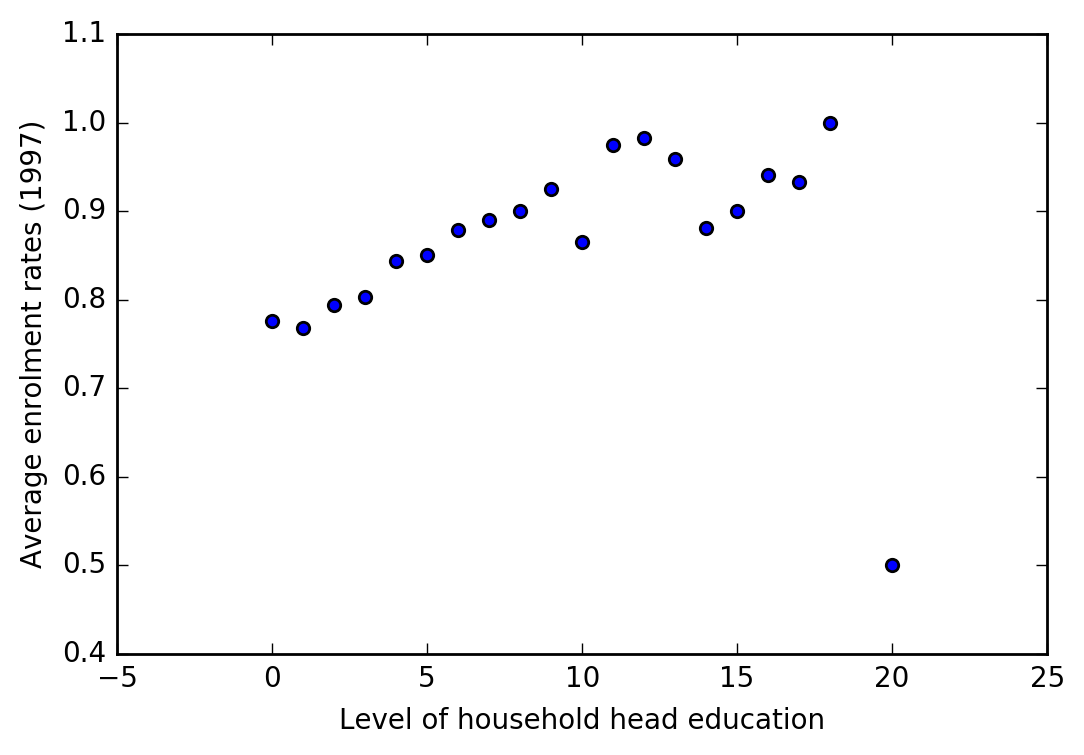

In [215]:
avg_ed_df = prog[prog['year']== 97].groupby('hohedu')['sc97'].mean()
#avg_ed_df.tail()
plt.scatter(avg_ed_df.index,avg_ed_df)
plt.xlabel('Level of household head education')
plt.ylabel('Average enrolment rates (1997)')

In [216]:
len(prog[prog.hohedu == 20])

2

From the above scatterplot, we observe that as the level of household head education increases, the average enrollment rate also follows a general upward tread. In other words, if the head of the household is well educated, they are more likely to send their children to school.
We do see an outlier for the case hohedu = 20, where we see a very low enrolment rate.
On further analysis, we see there are only 4 observation for this level, that may account for the surprisingly low number.

In [179]:
prog_97 = prog[(prog.year==97) & (prog.progresa==1) & (prog.poor==1)].groupby('village')['sc'].mean()
prog_98 = prog[(prog.year==98) & (prog.progresa==1) & (prog.poor==1)].groupby('village')['sc'].mean()

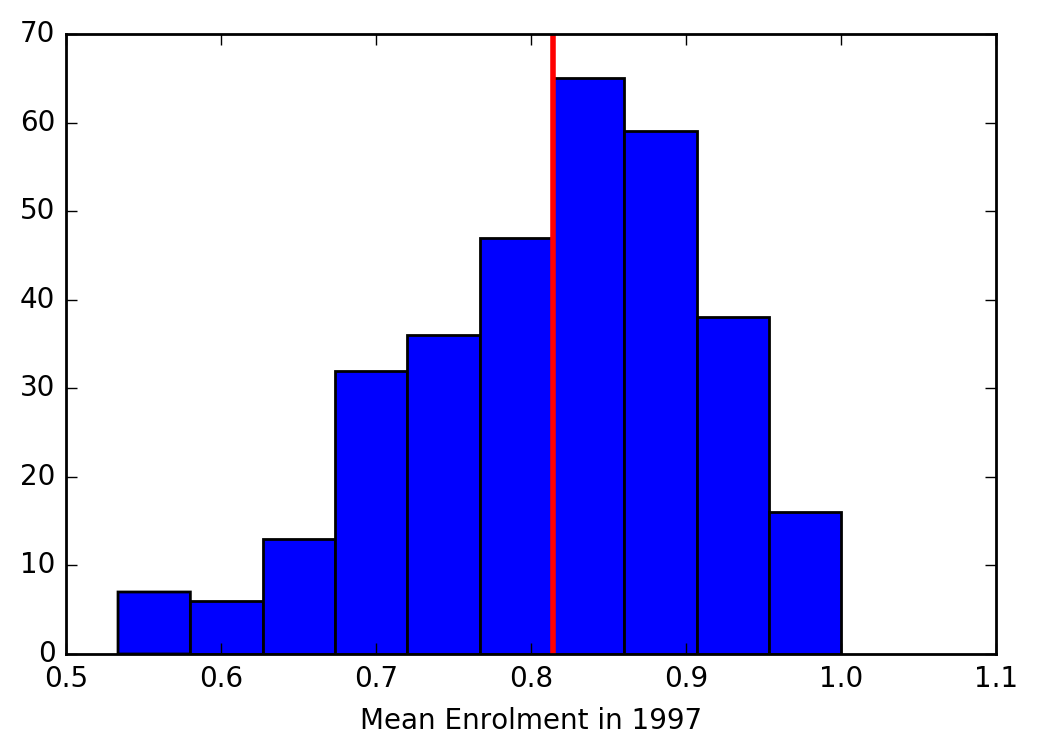

In [180]:
plt.hist(prog_97)
#range=[0.0, 1.0]
plt.xlabel('Mean Enrolment in 1997')
plt.axvline(x = prog_97.mean(),linewidth=2, color='r')

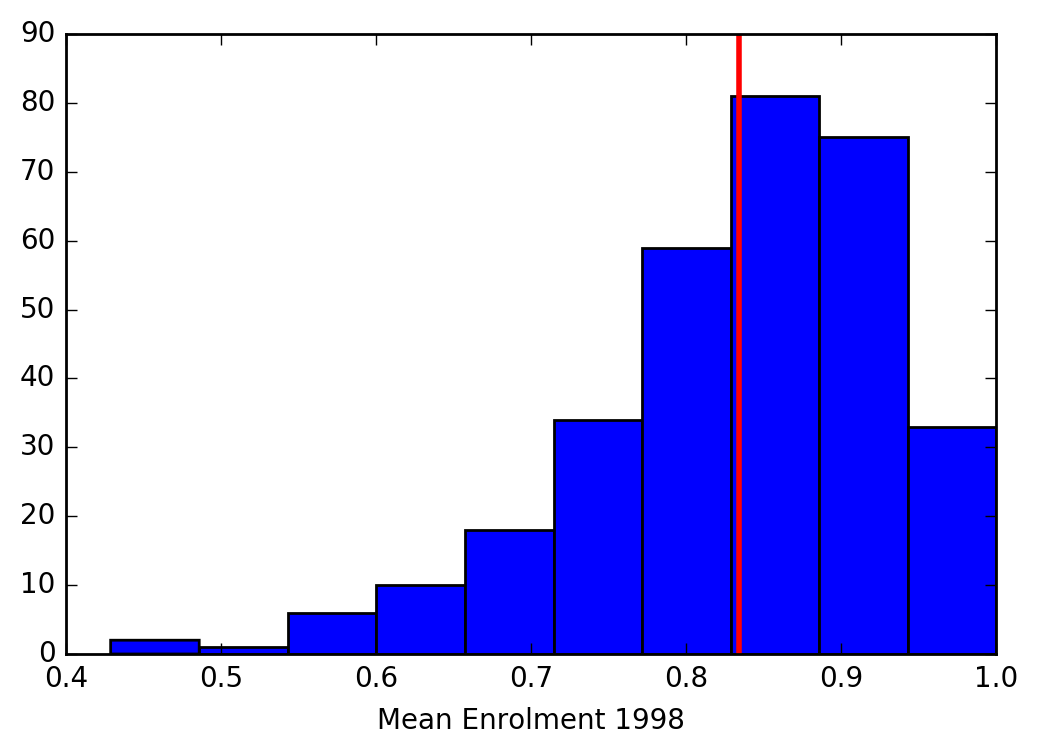

In [181]:
plt.hist(prog_98,range = [prog_98.min(),1.0])
plt.xlabel('Mean Enrolment 1998')
plt.axvline(x = prog_98.mean(),linewidth=2, color='r')

In [182]:
# Measuring statistical significance of mean enrollment rates between 1997 & 1998
ttest_ind(prog_97, prog_98).pvalue

0.010587739721624679

There appears to be a difference between the average enrolment rates among poor households in treated villages before and after the treatment.
A p-value of 0.01 leads us to believe that this difference may be statistically significant!

## Part 2: Measuring Impact

### 2.1 Simple differences: T-test

In [226]:
# Filter Data for treatment group , characteristics = poor and year 1998
treatment_df_98 = prog[(prog.poor==1)&(prog.year==98)&(prog.progresa==1)]
# Drop the year, folnum and village columns since we won't be needing them for now
treatment_mean_98= treatment_df_98.drop(['year', 'folnum', 'village'], axis=1).mean()
treatment_mean_98 = treatment_mean_98.iloc[3:4]

In [227]:
# Filter Data for control group , characteristics = poor and year 1998
control_df_98 = prog[(prog.poor==1)&(prog.year==98)&(prog.progresa==0)]
# Drop the year, folnum and village columns since we won't be needing them for now
control_mean_98 = control_df_98.drop(['year', 'folnum', 'village'], axis=1).mean()
control_mean_98 = control_mean_98.iloc[3:4]

In [228]:
# Create dataframe structure as per the question and insert average values for treatment and control for each categories
diff_df_98 = pd.DataFrame({'Variable name':treatment_mean_98.index, 'Average value (Treatment villages)':treatment_mean_98.values, 
                         'Average value (Control villages)':control_mean_98.values},
                       columns = ['Variable name', 'Average value (Treatment villages)', 'Average value (Control villages)'])

# Insert difference between treatment and control into the dataframe
diff_df_98['Difference (Treat - Control)'] = diff_df_98['Average value (Treatment villages)'] - diff_df_98['Average value (Control villages)']

In [229]:
# Creating empty dictionary to hold the p-values
pdict_1 = {}

# Insert p-values for each group into the dictionary
for i in treatment_mean_98.index:
    pdict_1.update({i: ttest_ind(treatment_df_98[i],control_df_98[i]).pvalue})

# Append the p-values into the dataframe created earlier
diff_df_98['p-value'] = diff_df_98['Variable name'].map(pdict_1)

In [230]:
print('Below is the difference between average enrollment among poor households in the Treatment villages and the average enrollment rate among poor households in the control villages in the year 1998, along with the p-value: \n ')
diff_df_98

Below is the difference between average enrollment among poor households in the Treatment villages and the average enrollment rate among poor households in the control villages in the year 1998, along with the p-value: 
 


,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,sc,0.849257,0.810923,0.038334,5.656456e-16


We do see a difference between average enrollment among poor households in the Treatment villages and the average enrollment rate among poor households in the control villages, after the treatment. A p-value of < 0.05 leads us to believe this difference is statistically significant. In other word, the treatment had an effect of increasing enrollment rates.
However, from our previous analysis (1.2), we had seen a statistically significant difference before the treatment as well i.e in the year 1997.  
Hence, our conclusion that the treatment was effective solely based on the difference in enrollment among group after treatment, may be misleading!

### 2.2 Simple differences: Regression

In [231]:
regression_df = prog[(prog.poor==1)&(prog.year==98)]

import statsmodels.formula.api as stat

regressor = stat.ols(formula = 'sc ~ progresa', data = regression_df).fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     65.64
Date:                Tue, 02 May 2017   Prob (F-statistic):           5.66e-16
Time:                        14:00:06   Log-Likelihood:                -11171.
No. Observations:               26155   AIC:                         2.235e+04
Df Residuals:                   26153   BIC:                         2.236e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.8109      0.004    217.190      0.000         0.804     0.818
progresa       0.0383      0.005      8.102      0.000         0.029     0.048
==============================================================================
Omnibus:                     7487.800   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15756.374
Skew:                          -1.796   Prob(JB):                         0.00
Kurtosis:                       4.245   Cond. No.                         3.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the above model, progresa increased the likelihood of a child enrolling by a value of 0.038 units. Or we can say there is a 3.8% higher chance of the child enrolling, due to the progresa program.


The estimate of a increase by 0.038 units is similar to what we got in the t-test from part 2.1. Also, in both cases we achieved statistical significants i.e similar p-values which are less that 0.05. We can say that both these tests have led us to similar results.


* Counterfactual:

Enrollment would be the same for treatment and control groups for poor, in the absence of treatment. In this case, it should be around 0.80, i.e when progresa = 0.

### 2.3 Multiple Regression

In [189]:
regressor_new = stat.ols(formula = 'sc ~ progresa + age + dist_sec + sex + hohedu + indig + fam_n + hohwag', data = regression_df).fit()
regressor_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     1168.
Date:                Tue, 02 May 2017   Prob (F-statistic):               0.00
Time:                        00:33:21   Log-Likelihood:                -7207.9
No. Observations:               26155   AIC:                         1.443e+04
Df Residuals:                   26146   BIC:                         1.451e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.5252      0.012    130.988      0.000         1.502     1.548
progresa       0.0348      0.004      8.554      0.000         0.027     0.043
age           -0.0649      0.001    -92.501      0.000        -0.066    -0.064
dist_sec      -0.0110      0.001    -11.806      0.000        -0.013    -0.009
sex            0.0308      0.004      7.799      0.000         0.023     0.039
hohedu         0.0082      0.001     10.250      0.000         0.007     0.010
indig          0.0490      0.004     11.532      0.000         0.041     0.057
fam_n         -0.0004      0.001     -0.514      0.607        -0.002     0.001
hohwag     -2.278e-06   2.82e-06     -0.806      0.420     -7.81e-06  3.26e-06
==============================================================================
Omnibus:                     3020.125   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4179.390
Skew:                          -0.968   Prob(JB):                         0.00
Kurtosis:                       3.293   Cond. No.                     5.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

On adding the controls to our regression model, our new point estimate is 0.0348 i.e a 3.48% higher chance of a child enrolling due to the treatment. This is lower than our previous point estimate of 3.8%. However, the values are still close.

We get a lower standard error of 0.004 after adding the control variable, compared to our earlier standard error of 0.005. Adding the control variables has helped us make a tighter estimate.


The minor difference in estimates after adding the control variables leads me to believe that beyond entry to a treatment or a control group, various factors such as age, distance to nearest secondary school also do play a part in the chance of a child enrolling.

### 2.4 Difference-in-Difference, version 1 (tabular)


In [194]:
diff_1 = treatment_df_98.sc.mean() - treatment_df.sc.mean()
diff_2 = control_df_98.sc.mean() - control_df.sc.mean()

diff = diff_1 - diff_2

diff

0.030702973230652075

Using the difference-in-difference approach, we see that progresa in associated with a 3.07% increase in enrolment rates after treatment. This is lower than our earlier estimate of impact i.e a 3.8% increases.
This method takes into consideration the statistically significant differences in enrolment rates among treatment and control groups at baseline, that we saw in part 1.

* Counterfactual:

In the absence of treatment, the average rate of enrollment changes by the same amount for both the treatment and control groups.

### 2.5 Difference-in-Difference, version 1 (regression)

In [191]:
z = []
for c in prog.year:
    if c == 97:
        z.append(0)
    elif c == 98:
        z.append(1)

prog.year = z

In [192]:
regressor_diff = stat.ols(formula = 'sc ~ progresa*year + progresa + year + age + dist_sec + sex + indig + fam_n + hohsex', data = prog[prog.poor == 1]).fit()
regressor_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     2397.
Date:                Tue, 02 May 2017   Prob (F-statistic):               0.00
Time:                        00:33:33   Log-Likelihood:                -16310.
No. Observations:               56893   AIC:                         3.264e+04
Df Residuals:                   56883   BIC:                         3.273e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.5203      0.009    177.129      0.000         1.503     1.537
progresa          0.0048      0.004      1.266      0.205        -0.003     0.012
year              0.0330      0.004      7.471      0.000         0.024     0.042
progresa:year     0.0304      0.006      5.446      0.000         0.019     0.041
age              -0.0658      0.000   -143.935      0.000        -0.067    -0.065
dist_sec         -0.0112      0.001    -17.635      0.000        -0.012    -0.010
sex               0.0333      0.003     12.323      0.000         0.028     0.039
indig             0.0515      0.003     17.761      0.000         0.046     0.057
fam_n            -0.0016      0.001     -2.765      0.006        -0.003    -0.000
hohsex            0.0104      0.005      1.973      0.049      6.78e-05     0.021
==============================================================================
Omnibus:                     5613.804   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7456.053
Skew:                          -0.884   Prob(JB):                         0.00
Kurtosis:                       3.151   Cond. No.                         96.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above summary table, we see the coefficient of the "progresa:year" variable is 0.0313, with a standard error of 0.006. This is essentially the effect of progresa on the enrolment, taking into consideration the significant differences in values between the treatment and control groups at baseline.
Thus, we say that taking into account the differences in enrolment between treatment and control groups before treatment, child enrolment increases by 0.0304 or 3.04% after treatment for the treatment group. 

These treatment effect are lower than our estimates from the simple difference method. Also, we get a slightly higher standard error of 0.06, compared to the case of simple difference.
While this in a way leads us to believe that the treatment had lesser effect that we anticipated earlier with higher uncertainity, I feel this approach is more rounded and our understanding of the effects are more accurate.

Compared to the earlier estimate from (2.4) where we got an estimate of 0.307 or 3.07% increase in enrolment, we get a lower value in the case of multiple linear regression i.e 0.0304 or a 3.04% increase in child enrolment due to progresa. This reduction in estimate can be because of the control variables that we have used in the model. Beyond the presence of treatment (Which was the deciding factor in the difference-in-difference approach), the control variables also play a part in deciding child enrolment rates.
Hence, we have have improved our estimates further using the multiple regression method.

* Counterfactual:

Enrollment would be the same for treatment and control groups, in the absence of treatment , given that the control variables such as age, sex, distance from nearest secondary school etc. remained the same.

### 2.6 Difference-in-Difference, version 2
 
An alternative approach would be to compare enrollment rates in 1998 between poor and non-poor across treatment and control villages. 

In [195]:
regressor_diff1 = stat.ols(formula = 'sc ~ progresa*poor + progresa + poor + age + dist_sec + sex + indig + fam_n + hohsex', data = prog[prog.year == 1]).fit()
regressor_diff1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     1202.
Date:                Tue, 02 May 2017   Prob (F-statistic):               0.00
Time:                        01:22:46   Log-Likelihood:                -8885.6
No. Observations:               30665   AIC:                         1.779e+04
Df Residuals:                   30655   BIC:                         1.787e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.5860      0.014    113.949      0.000         1.559     1.613
progresa          0.0271      0.010      2.756      0.006         0.008     0.046
poor             -0.0216      0.008     -2.578      0.010        -0.038    -0.005
progresa:poor     0.0081      0.011      0.758      0.448        -0.013     0.029
age              -0.0661      0.001   -101.108      0.000        -0.067    -0.065
dist_sec         -0.0123      0.001    -14.004      0.000        -0.014    -0.011
sex               0.0304      0.004      8.228      0.000         0.023     0.038
indig             0.0514      0.004     12.503      0.000         0.043     0.059
fam_n            -0.0031      0.001     -3.779      0.000        -0.005    -0.001
hohsex            0.0179      0.007      2.440      0.015         0.004     0.032
==============================================================================
Omnibus:                     3325.606   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4531.778
Skew:                          -0.937   Prob(JB):                         0.00
Kurtosis:                       3.189   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This version of estimate would take into account the enrolment rates between poor and non-poor groups, across the treatment and control groups. From the above summary of our regression, the coefficient of the parameter "progresa:poor" will give us our required estimate.
By this method, we see that progresa had a very minor impact on the enrolment rate (0.008) or 0.8%.

* Counterfactual:

Difference between average enrolment rates of treatment and control groups should be same for poor and non-poor families in the absence of treatment.

The treatment effects of 0.8% increase is much lower than our previous estimate of 0.034 or 3.4%.


In the previous case, we measures how progresa impacted enrolment rates for poor families over time i.e before treatment and after treatment. Since, the program was targetted for the poor, this approach seems a more realistic way to understand if the program succeeded overall.

In this case, we are only considering the post-treatment period, across the poor and non-poor groups. While the program may have succeeded in its target of increasing enrolment in poor villages, this approach wouldn't allow us to observe that, as we don't take into consideration any sort of baseline for the poor. This may have led to inaccurate estimates.

### 2.7 Spillover effects (extra credit)

Now, we usa a double-difference regression to estimate the impact of PROGRESA on non-poor households. In other words, compare the difference in enrollments between 1997 and 1998 for non-poor households in treatment villages with the difference in enrollments between 1997 and 1998 for non-poor households in control villages.

In [67]:
regressor_diff2 = stat.ols(formula = 'sc ~ progresa*year + progresa + year + age + dist_sec + sex + indig + fam_n + hohsex', data = prog[prog.poor == 0]).fit()
regressor_diff2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     447.7
Date:                Mon, 01 May 2017   Prob (F-statistic):               0.00
Time:                        20:43:14   Log-Likelihood:                -3727.8
No. Observations:               10378   AIC:                             7476.
Df Residuals:                   10368   BIC:                             7548.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.6289      0.022     73.000      0.000         1.585     1.673
progresa          0.0269      0.009      2.875      0.004         0.009     0.045
year              0.0396      0.011      3.649      0.000         0.018     0.061
progresa:year    -0.0017      0.014     -0.119      0.905        -0.029     0.026
age              -0.0697      0.001    -61.641      0.000        -0.072    -0.067
dist_sec         -0.0172      0.002     -9.709      0.000        -0.021    -0.014
sex               0.0306      0.007      4.488      0.000         0.017     0.044
indig             0.0488      0.010      4.816      0.000         0.029     0.069
fam_n            -0.0081      0.001     -5.606      0.000        -0.011    -0.005
hohsex            0.0197      0.014      1.424      0.154        -0.007     0.047
==============================================================================
Omnibus:                      844.887   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              832.796
Skew:                          -0.639   Prob(JB):                    1.45e-181
Kurtosis:                       2.458   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

PROGRESA may have created awareness among the public about importance of educating children. This may have affected non-poor households in the following ways:

    1. Non-poor households near the threshold income level may have chosen to send their children to schools, as a result of awareness drives in the year 1997. This may have led to their family income falling below the threshold by 1998, making them eligible for the program.
    2. Overall, seeing other families (poor) send their kids to school, may have motivated the non-poor families to follow suit. Since, they would already have been able to afford sending their kids to school, this may have acted as an motivation for them to do the same.

From the "progresa:year" coefficient, we see the enrolment has decreased negligibly (0.0017). Also, the p-value of 0.9 is much higher than 0.05.
Hence, this change is not significant.
Overall, we can say that PROGRESA did not have any significant impact on the non-poor.

Public awareness about progresa may have acted as an motivation for non-poor households, who weren't the target nor were eligible for the program, to enroll their children in schools.

### 2.8 Summary

We have used different types of methods to estimate the impact of PROGRESA on enrollment rates for poor households in Mexico. The simple difference may be a naive way to estimate the impact , since there were significant underlying differences between treatment and control groups before the start of treatment. However, the difference-in-difference methods do take it into consideration.

* Irrespective of the method, in all the cases, the effects that we got were statistically significant ( p-value < 0.05) , and we got an average increase in enrollment of 3-3.9% due to progresa across all the methods, with a standard error between 0.4 - 0.6 %.

* Since the treatment and control groups were randomly assigned from the poor families according to the baseline survey in 1997, we can assume that there is no bias in the underlying data. Since, the welfare index for eligibility was kept a secret, this also helps in preventing any bias, since the non-poor families would not have any way to enrol into the program using unfair means.

* The absense of any spill-over effect from 2.7 means there was no impact of treatment when seen from the perspective of poor and non-poor households, after treatment. Since, the program targeted the poor families, our previous analysis over time (1997-1998) and the significant results we got from the same helps us understand that the effect of increased enrollment in poor, follows the cause i.e PROGRESA.

* It also makes logical sense that providing funds, should encourage families to send their children to school, since the government helps them to certain extent with their financial burder and getting educated will help such families earn a better living in the future.

Hence, overall I feel Progresa did have a causal impact on the enrollment rates of poor households in Mexico.